## Home Task


Apply various clustering algorithms 

- Agglomerative clustering using `complete` linkage 
- Agglomerative clustering using `single` linkage 
- DBSCAN
- Use elbow method to determine the best k for Kmeans


###  Data 

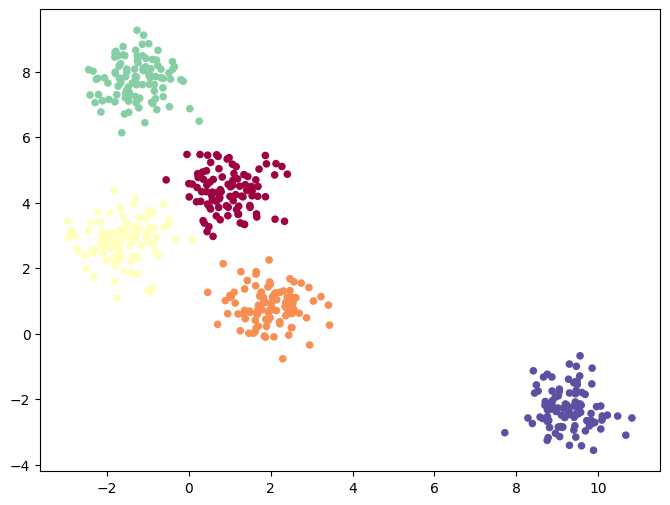

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from kneed import KneeLocator

# %matplotlib inline

X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val) for val in np.linspace(0, 1, len(set(y)))])

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c = colors[y], s = 20)

###  Agglomerative clustering using `complete` linkage 

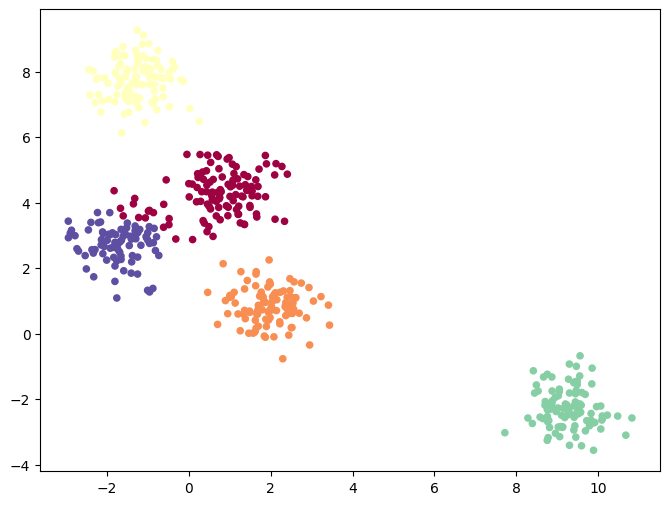

In [3]:
model_complete = AgglomerativeClustering(n_clusters=5, linkage='complete')
labels_complete = model_complete.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors[labels_complete], s=20)
plt.show()

### Agglomerative clustering using `single` linkage 

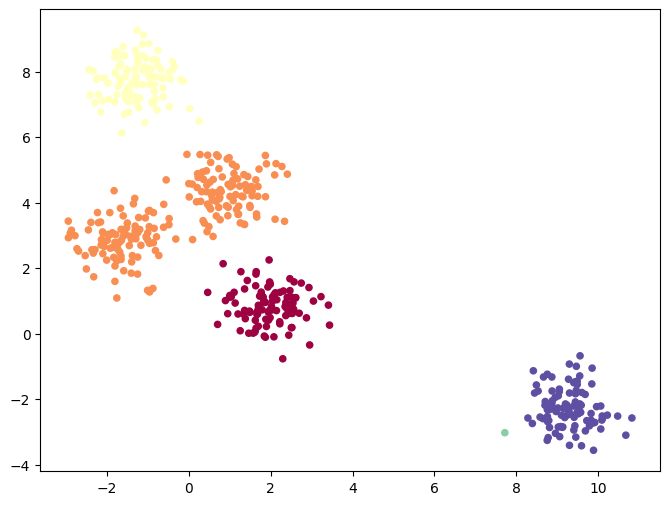

In [4]:
model_single = AgglomerativeClustering(n_clusters=5, linkage='single')
labels_single = model_single.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors[labels_single], s=20)
plt.show()

### DBSCAN

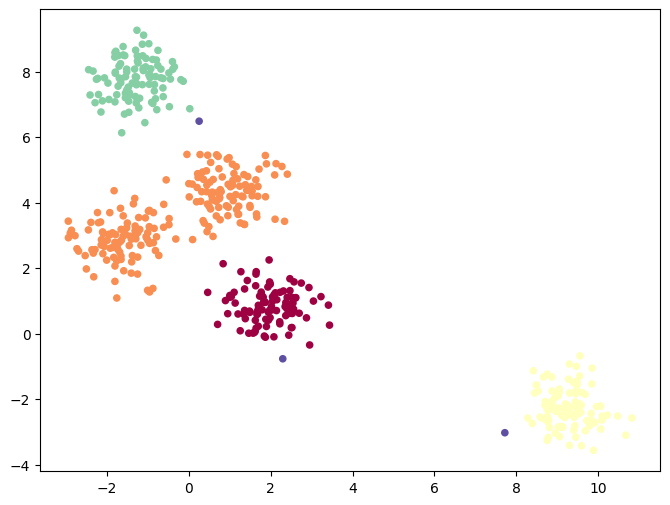

In [5]:
model_dbscan = DBSCAN(eps=0.7, min_samples=5)
labels_dbscan = model_dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors[labels_dbscan], s=20)
plt.show()

### K-means clustering with the elbow method to determine the best k

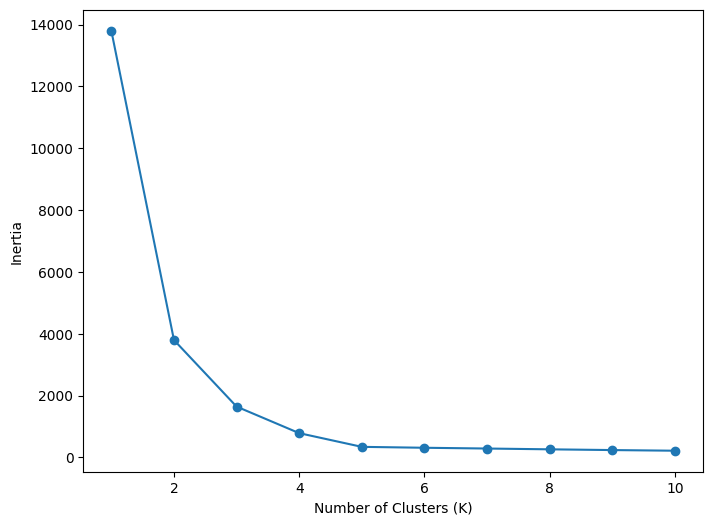

In [6]:
import warnings
warnings.filterwarnings("ignore")

inertia_values = []
possible_k_values = range(1, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(possible_k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

### Elbow method to determine the best k for Kmeans

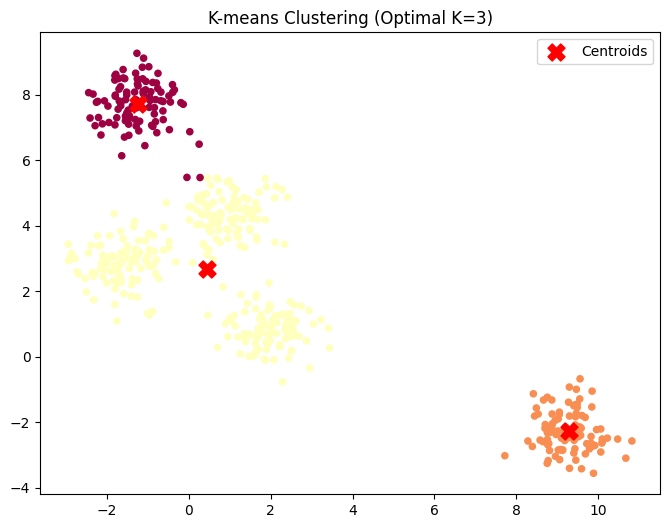

In [7]:
kl = KneeLocator(possible_k_values, inertia_values, curve='convex', direction='decreasing')
optimal_k = kl.elbow

model_kmeans = KMeans(n_clusters=optimal_k, random_state=0)
labels_kmeans = model_kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors[labels_kmeans], s=20)
plt.scatter(model_kmeans.cluster_centers_[:, 0], model_kmeans.cluster_centers_[:, 1], c='red', marker='X', s=150, label='Centroids')
plt.title(f'K-means Clustering (Optimal K={optimal_k})')
plt.legend()
plt.show()